In [1]:
pip install shap


  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ---------------------------------------- 0.0/489.8 kB ? eta -:--:--
   --- ----------------------------------- 41.0/489.8 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  481.3/489.8 kB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 489.8/489.8 kB 4.4 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.6/2.8 MB 17.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.8 MB 7.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.8 MB 7.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.8 MB 7.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.8 MB 7.3 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 4


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\kapil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


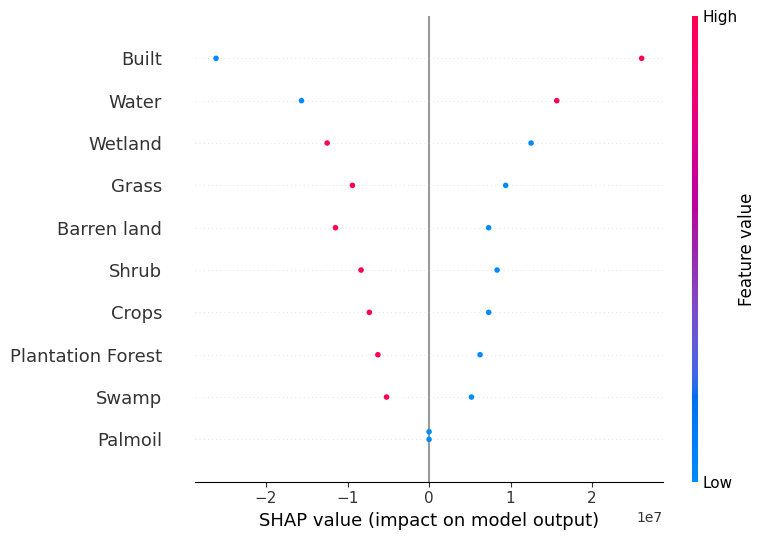

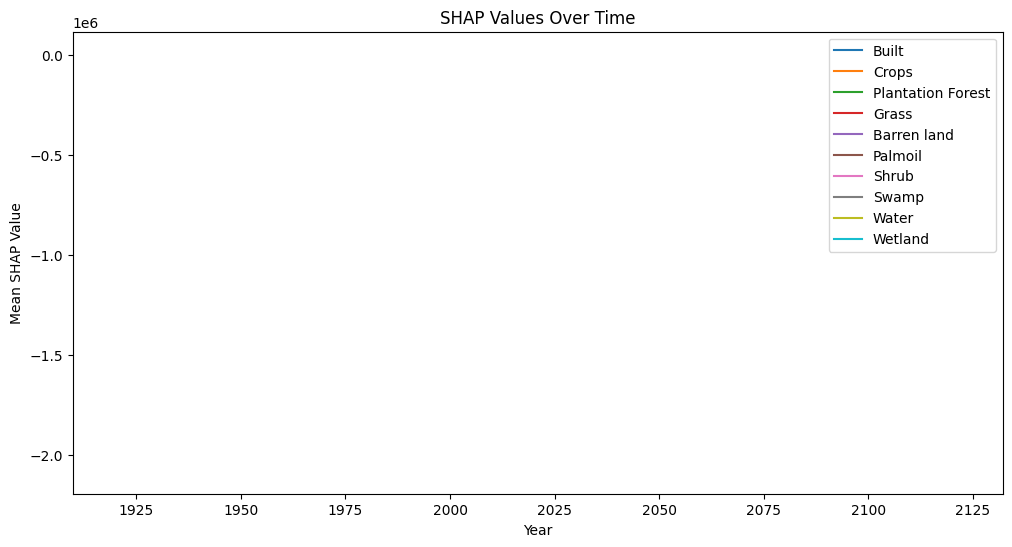

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Input data for Mumbai and Satara
# Replace with your actual dataset if loading from file
mumbai_data = {
    'Year': [2020, 2021, 2022, 2023],
    'Built': [314763403.3, 314763403.3, 314763403.3, 315214510.1],
    'Crops': [3887548.329, 2555909.613, 3167427.704, 3355368.083],
    'Plantation Forest': [20228183.42, 24787570.28, 17011091.85, 9950564.69],
    'Grass': [49287072.13, 44520807.78, 53960545.02, 53836806.27],
    'Barren land': [89824.31823, 466126.4628, 277973.412, 277973.412],
    'Palmoil': [0, 0, 0, 0],
    'Shrub': [0, 0, 0, 0],
    'Swamp': [21818215.77, 20389032.92, 19702396.88, 26736174.75],
    'Water': [144553863, 144365709.9, 144362465.4, 144365709.9],
    'Wetland': [46678640.42, 49458190.38, 48061447.17, 47569643.51],
    # 'Total':[601306750.7,	601306750.7,	601306750.7,	601306750.7]
}

satara_data = {
    'Year': [2020, 2021, 2022, 2023],
    'Built': [105689540.7, 105689540.7, 106144391.9, 106409724],
    'Crops': [8417297393, 8452073569, 8613980274, 8264285527],
    'Plantation Forest': [215391835.9, 242364305.7, 192327919.1, 185712762.7],
    'Grass': [701581320.7, 607381500.3, 567000917.9, 728967106.5],
    'Palmoil': [0, 0, 0, 0],
    'Barren land': [3557964.526, 2156700.483, 869607.3113, 1286009.417],
    'Shrub': [1327292.156, 871591.043, 303210.1094, 454972.0234],
    'Swamp': [953589450.3, 972712512.4, 905733036.9, 1092909921],
    'Water': [27274123.12, 29928219.75, 29160474.63, 27844211.21],
    'Wetland': [80967951.95, 93498933, 91157040.31, 98806638.03],
    # 'Total': [10506676872,	10506676872,	10506676872,	10506676872]
}

# Convert dictionaries to DataFrames
mumbai_df = pd.DataFrame(mumbai_data)
satara_df = pd.DataFrame(satara_data)

# Add location column and combine data
mumbai_df['Location'] = 'Mumbai'
satara_df['Location'] = 'Satara'
data = pd.concat([mumbai_df, satara_df], ignore_index=True)

# Prepare data for SHAP analysis
X = data.drop(columns=['Year', 'Location'])
y = data['Built']  # Example target (can replace with another column or derived metric)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP Analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Feature Importance Analysis
shap.summary_plot(shap_values, X_test)

# Time Series Pattern Analysis
# Add temporal context to SHAP values
shap_values_with_year = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_values_with_year['Year'] = data.iloc[X_test.index]['Year'].values

# Mean SHAP value per year for each feature
mean_shap_per_year = shap_values_with_year.groupby('Year').mean()

# Plot SHAP values over time
plt.figure(figsize=(12, 6))
for feature in X.columns:
    plt.plot(mean_shap_per_year.index, mean_shap_per_year[feature], label=feature)
plt.title('SHAP Values Over Time')
plt.xlabel('Year')
plt.ylabel('Mean SHAP Value')
plt.legend()
plt.show()